In [1]:
# import 


# data handling
import numpy as np
import pandas as pd

# plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# fine-tune and evaluate
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import LinearSVC

# constant (you can change these based on your system)
DATASET_LINK = 'data/heart_2020_cleaned.csv'

# Visualizing Data

In [2]:
data =  pd.read_csv(DATASET_LINK)

In [3]:
# dtypes and number of rows/columns as well as null value check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# data preview
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


No: 292422
Yes: 27373


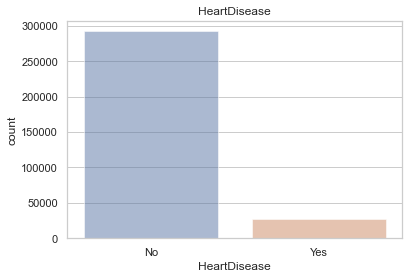

In [9]:
# there's one most important feature that we need to visualize (HeartDisease)
# since this dataset is imbalance, the result of our algorithm may be seriously affected

# Define Seaborn color palette to use
sns.set(style='whitegrid')
plot = sns.countplot(data=data, x='HeartDisease', alpha=0.5)
plot.set_title('Imbalance Data')

# print the numbers
h = data.HeartDisease.value_counts()
print("No:", h['No'])
print("Yes:", h['Yes'])

# Preprocessing

In [5]:
# split numerical/categorical attributes
cat_attr = data.select_dtypes(include=[object])
num_attr = data.select_dtypes(include=[np.number])
print(cat_attr.columns)
print(num_attr.columns)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


In [6]:
# adding id column
data['id'] = range(1, len(data) + 1)
data = data.set_index('id')

for name in cat_attr.columns:
    Dummies = pd.get_dummies(data[name]).add_prefix(name)
    data = data.merge(Dummies, on='id')
    data = data.drop([name], axis=1)

In [7]:
# result
data

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseNo,HeartDiseaseYes,SmokingNo,SmokingYes,AlcoholDrinkingNo,AlcoholDrinkingYes,...,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaNo,AsthmaYes,KidneyDiseaseNo,KidneyDiseaseYes,SkinCancerNo,SkinCancerYes
id,,,,,,,,,,,,,,,,,,,,,
1,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
2,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
3,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
4,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
5,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,27.41,7.0,0.0,6.0,0,1,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
319792,29.84,0.0,0.0,5.0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,1,0
319793,24.24,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [8]:
# calculate correlation table
correlation = data.corr()

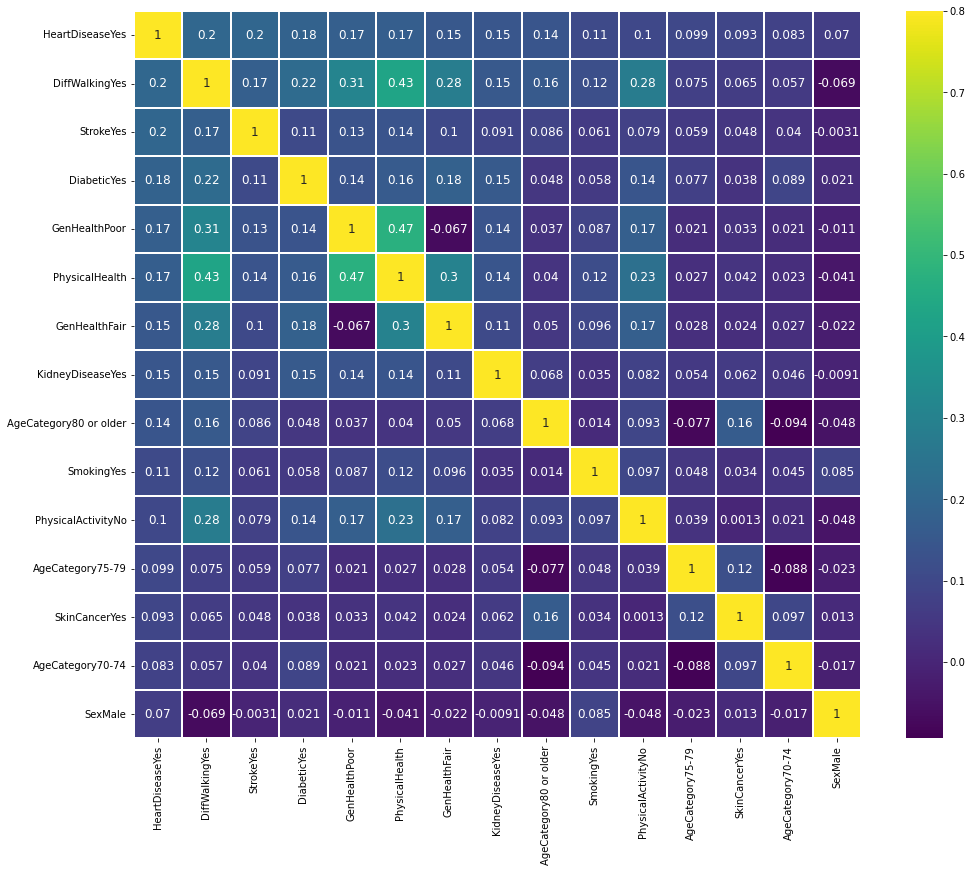

In [9]:
# visualize the correlation table
k = 15 # pick k most correlated features
cols = correlation.nlargest(k, 'HeartDiseaseYes').index
cm = correlation.loc[cols, cols]

fig, ax = plt.subplots(figsize=(14, 12), constrained_layout=True)
_ = sns.heatmap(cm, ax=ax, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
                linecolor='white', xticklabels=cols.values, yticklabels=cols.values, annot_kws={'size' : 12})

In [10]:
# scale the data
scaler = MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)

data_prepared = pd.DataFrame(d, columns=names)
data_prepared

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseNo,HeartDiseaseYes,SmokingNo,SmokingYes,AlcoholDrinkingNo,AlcoholDrinkingYes,...,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaNo,AsthmaYes,KidneyDiseaseNo,KidneyDiseaseYes,SkinCancerNo,SkinCancerYes
0,0.055294,0.100000,1.0,0.173913,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.100447,0.000000,0.0,0.260870,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.175782,0.666667,1.0,0.304348,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.147169,0.000000,0.0,0.217391,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.141132,0.933333,0.0,0.304348,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,0.233333,0.0,0.217391,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0.215139,0.000000,0.0,0.173913,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,0.147531,0.000000,0.0,0.217391,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,0.250996,0.000000,0.0,0.478261,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
# select certain relevant feature to train
data_filtered = data_prepared[cols]
data_filtered

,HeartDiseaseYes,DiffWalkingYes,StrokeYes,DiabeticYes,GenHealthPoor,PhysicalHealth,GenHealthFair,KidneyDiseaseYes,AgeCategory80 or older,SmokingYes,PhysicalActivityNo,AgeCategory75-79,SkinCancerYes,AgeCategory70-74,SexMale
0,0.0,0.0,0.0,1.0,0.0,0.100000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.933333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,1.0,0.0,1.0,0.0,0.233333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
319791,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
319792,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319793,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# handle imbalance data 

# split the data into 2 groups
class_0 = data_filtered[data_filtered["HeartDiseaseYes"] == 0]
class_1 = data_filtered[data_filtered["HeartDiseaseYes"] == 1]

# resample the data
class_1 = class_1.sample(len(class_0), replace=True)
data_filtered = pd.concat([class_0, class_1], axis=0)

data_filtered["HeartDiseaseYes"].value_counts()  # now our data is no longer imbalance

0.0    292422
1.0    292422
Name: HeartDiseaseYes, dtype: int64

In [13]:
# get X, y dataset
y = data_filtered['HeartDiseaseYes']
X = data_filtered.drop(['HeartDiseaseYes'], axis=1)

In [14]:
# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Evaluate


Since this dataset is imbalance, the very high accuracy is actually useless (even if you always predict 'No', the accuracy is still going to be above 90%).


Precision can be interpreted as the accuracy of the positive predictions.


$precision = \frac{TP}{TP + FP}$


Recall can be interpreted as the ratio of positive instances that are correctly detected by the classifier.


$recall = \frac{TP}{TP + FN}$


It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.


$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

Simply put, recall demonstrates the algorithm's ability to detect a given class in general, while precision demonstrates the ability to distinguish this class from other classes. To solve our problem, you should choose the algorithm with the highest recall, but the choice of the final algorithm is up to you.

In [15]:
# let's train some models

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'model: {str(model)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-' * 30, '\n')

In [16]:
model = KNeighborsClassifier()
train_model(model)

model: KNeighborsClassifier()
Accuracy_score: 0.7325616188904752
Precission_score: 0.7454272700983228
Recall_score: 0.7057323750855579
F1-score: 0.725036917235075
------------------------------ 



In [17]:
model = RandomForestClassifier()
train_model(model)

model: RandomForestClassifier()
Accuracy_score: 0.7639032564183672
Precission_score: 0.7651937504301741
Recall_score: 0.7609514031485284
F1-score: 0.7630666803939737
------------------------------ 



In [18]:
model = LinearSVC(max_iter=3000)
train_model(model)

model: LinearSVC(max_iter=3000)
Accuracy_score: 0.7393753900606144
Precission_score: 0.7604972324207466
Recall_score: 0.6982546201232033
F1-score: 0.7280480298313068
------------------------------ 



In [19]:
model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
train_model(model)

model: SGDClassifier(random_state=42)
Accuracy_score: 0.7341004881635305
Precission_score: 0.732481801483094
Recall_score: 0.7369438740588637
F1-score: 0.7347060629840664
------------------------------ 



# Fine-tune

In [20]:
# we will go back to this part when we fully understand how the model works 
# and what hyperparameter to fine-tune, as well as the tools used to fine-tune them.

# Testing and Launching

In [22]:
# we will test the best model when we are totally ready
# we can generate the data for testing like so

data_test = data_prepared.copy()
data_test = data_test[cols] # get the neccessary columns 

# split train/test using imbalance data
X_80, X_20, y_80, y_20 = train_test_split(X, y, test_size=0.2, random_state=42)